In [2]:
'''
Created on October 31st 2017
@author: Juan Manuel Acevedo Valle
''' 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import h5py, os, sys, random
from scipy.stats import gaussian_kde
from scipy import stats
from scipy.stats.distributions import norm    

In [3]:
%matplotlib inline
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr, shapiro, anderson
from scipy.spatial import ConvexHull

colors_ = ['firebrick', 'darkgreen', 'navy', 'm', 'deepskyblue', 'goldenrod', 'black', 'grey']

from SensorimotorExploration.DataManager.SimulationData import load_sim_h5_v2 as load_sim_h5
from SensorimotorExploration.DataManager.PlotTools import *
from results_utils import *

In [4]:
directories = {
               50: 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_050/',
               123: 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_123/',
               223: 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_223/',
               323: 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_323/'
              }

besties = {
               50: '0.999999',
               123: '0.93',
               223: '0.99',
               323: '0.96'
              }

data_files = []
for key in directories.keys():
    data_files += [directories[key] + file_ for file_ in os.listdir(directories[key])]

n_samples = 102000
# Group by:
alpha_social_thresh = ['1_0', '0_999999', '0_99', '0_96', '0_93']
mode_ops = ['social']

groups1 = itertools.product(alpha_social_thresh, mode_ops)
groups2 = itertools.product(['1'], ['autonomous'])

groups_k =  list(groups2) + list(groups1)

for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
    data_file = data_file
    conf_file = data_file.replace('sim_data.h5', 'conf.txt')
    conf = {}
    with open(conf_file) as f:
        for line in f:
            line = line.replace('\n', '')
            (key, val) = line.split(': ')
            conf[key] = val
    data,foo = load_sim_h5(data_file)
    try:
        concat_sensor = np.append(concat_sensor, data.sensor.data.as_matrix(), axis=0)
#         print "Appending"
    except:
        concat_sensor = data.sensor.data.as_matrix()
#         print "First set"

# print('Processing ' + group)
print("The shape of the data for PCA is:")
print(concat_sensor.shape)
pca = PCA(n_components = 4)      
pca.fit(concat_sensor[:,[0,1,3,4]])
print("Variance contribution per per principal axes: ")
print(str(pca.explained_variance_))    
print("% Variance contribution per per principal axes: ")
print( str(pca.explained_variance_ratio_))    
print("Principal directions [n_components_n_features]:")
print(pca.components_)


The shape of the data for PCA is:
(14688016, 6)
Variance contribution per per principal axes: 
[ 0.65913262  0.60861351  0.01977186  0.01408515]
% Variance contribution per per principal axes: 
[ 0.5064006   0.46758762  0.01519039  0.01082139]
Principal directions [n_components_n_features]:
[[ 0.22888362  0.25109933  0.58528302  0.73621003]
 [ 0.61324388  0.71300956 -0.19969489 -0.2750841 ]
 [-0.04227185  0.05505914 -0.78362652  0.61734193]
 [-0.75482271  0.65233042  0.05912033 -0.03482064]]


In [5]:
import h5py, random
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm    

def plotPDFx_y(axes, data, color):
    if len(directories)==0:
        return  
    x_grid = np.linspace(-2.0, 2., 500)
    y_grid = np.linspace(-2.0, 2., 500)
    
    sensor_data = pca.transform(data)
    
    # The grid we'll use for plotting

    #------ kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs) 
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.

    # pdf = gaussian_kde(sensor_data1[:,0], bw_method=0.02/  sensor_data1[:,0].std(ddof=1)).evaluate(x_grid)
    kde_x = gaussian_kde(sensor_data[:,0])
    pdf_x = kde_x.evaluate(x_grid)
    axes[0].plot(x_grid, pdf_x, color=color, alpha=0.4, lw=3.5)
    axes[0].set_xlim(-1.5, 1.5)

    
    # pdf = gaussian_kde(sensor_data1[:,1], bw_method=0.02 / sensor_data1[:,1].std(ddof=1)).evaluate(y_grid)
    kde_y = gaussian_kde(sensor_data[:,1])
    pdf_y = kde_y.evaluate(y_grid)
    axes[1].plot(y_grid, pdf_y, color=color, alpha=0.4, lw=3.5)
    axes[1].set_xlim(-1.5, 1.5)
                 
    tmp_dict = {'KDEx_': kde_x, 'KDEy_': kde_y, 'PDFx_': pdf_x, 'PDFy_': pdf_y }
    return tmp_dict

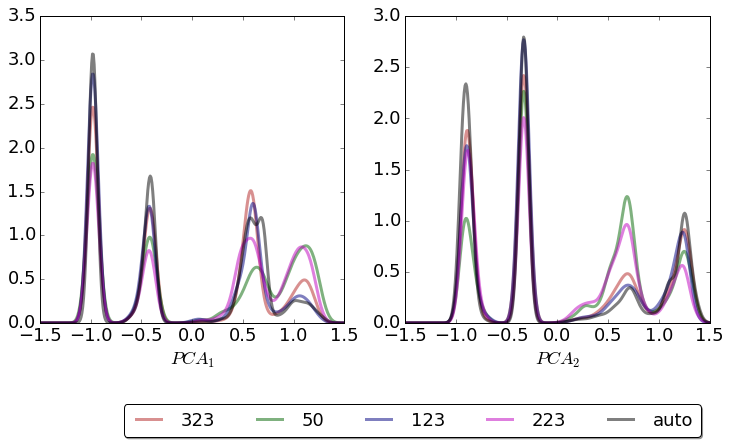

In [9]:
dist_used = 'euclidean'
sensor_data = None

matplotlib.rcParams['figure.figsize'] = (12.0, 5.5)
matplotlib.rcParams.update({'font.size': 18})

fig, axes = plt.subplots(1,2)
lgd = []
for key, color_ in zip(directories.keys(),colors_): # for key, color in zip(error_ev_av.keys(), colors_):
    lgd += [str(key)]
    data_files = [directories[key] + file_ for file_ in os.listdir(directories[key])]
    for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
        data_file = data_file
        conf_file = data_file.replace('sim_data.h5', 'conf.txt')
        conf = {}
        with open(conf_file) as f:
            for line in f:
                line = line.replace('\n', '')
                line = line.replace('\r', '')
                (key_, val) = line.split(': ')
                conf[key_] = val
        data,foo = load_sim_h5(data_file)
        if conf['instructor_slope']==besties[key]  and conf['mode']=='social':
            try:
                concat_sensor_s = np.append(concat_sensor_s, data.sensor.data.as_matrix(), axis=0)
            except:
                concat_sensor_s = data.sensor.data.as_matrix()
        elif conf['mode']=='autonomous' and key == 223  :
            try:
                concat_sensor_a = np.append(concat_sensor_a, data.sensor.data.as_matrix(), axis=0)
            except:
                 concat_sensor_a = data.sensor.data.as_matrix()    
    plotPDFx_y(axes, concat_sensor_s[:,[0,1,3,4]],color_)
    del concat_sensor_s
plotPDFx_y(axes, concat_sensor_a[:,[0,1,3,4]],'black')

plt.sca(axes[0])
plt.xlabel('$PCA_1$')
plt.sca(axes[1])
plt.xlabel('$PCA_2$')

lgd += ['auto']
lgd = plt.legend(lgd,\
           ncol=5,loc='lower right', fontsize=18, bbox_to_anchor=(1., -0.4),
          fancybox=True, shadow=True)

In [11]:
fig.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/IEEE_TCDS_Special_Issue/images/PCA.eps',\
             format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
directory = 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_223/'
data_files = os.listdir(directory)

n_samples = 102000
# Group by:
alpha_social_thresh = ['1_0', '0_999999', '0_99', '0_96', '0_93']
mode_ops = ['social']

groups1 = itertools.product(alpha_social_thresh, mode_ops)
groups2 = itertools.product(['1'], ['autonomous'])

groups_k =  list(groups2) + list(groups1)

concat_sensor = create_dict(groups_k)

for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
    data_file = directory + data_file
    conf_file = data_file.replace('sim_data.h5', 'conf.txt')
    conf = {}
    with open(conf_file) as f:
        for line in f:
            line = line.replace('\n', '')
            (key, val) = line.split(': ')
            conf[key] = val
    if conf['mode'] == 'autonomous':
        conf['instructor_slope'] = '1'
    else:
        conf['instructor_slope'] = conf['instructor_slope'].replace('.','_')
            

    data,foo = load_sim_h5(data_file)
    try:
        key = conf['instructor_slope'] + '&' + conf['mode']
        concat_sensor[key] = np.append(concat_sensor[key], data.sensor.data.as_matrix(), axis=0)
#         print "Appending"
    except:
        concat_sensor[key] = data.sensor.data.as_matrix()
#         print "First set"

for i, k in enumerate(groups_k):
    group = k[0] + '&' + k[1] 
    print('Processing ' + group)
    print("The shape of the data for PCA is:")
    print(concat_sensor[group].shape)
    pca = PCA(n_components = 4)      
    pca.fit(concat_sensor[group][:,[0,1,3,4]])
    print("Variance contribution per per principal axes: ")
    print(str(pca.explained_variance_))    
    print("% Variance contribution per per principal axes: ")
    print( str(pca.explained_variance_ratio_))    
    print("Principal directions [n_components_n_features]:")
    print(pca.components_)


In [ ]:
directory = 'diva_IEEE_SI/experiment_IEEE_SI_slopes_cmf_050/'

 print("Loading data for PCA...")
    sensor_data = None
    for i in range(len(directories)): 
        directory = directories[i]
        mat = h5py.File(directory + 'SMdata.mat','r')
        data = np.array(mat.get('SMdata'))
        mat = h5py.File(directory + 'PRdata.mat','r')
        proprio_data = np.array(mat.get('PRdata'))
        proprio_data = proprio_data[[-1],:]
        try:
            sensor_data_tmp = np.transpose(data[[0,1,3,4],:])
            sensor_data_tmp = sensor_data_tmp[np.where(proprio_data  < proprio_criteria)[1],:]
            sensor_data = np.append(sensor_data,sensor_data_tmp,axis=0)
        except:
            sensor_data = np.transpose(data[[0,1,3,4],:])
            sensor_data = sensor_data[np.where(proprio_data < proprio_criteria)[1],:]

    pca =PCA(n_components=1)      
    pca.fit(sensor_data)
    print("The shape of the data for PCA is:")
    print(sensor_data.shape)
    print("Variance contribution per per principal axes: ")
    print(str(pca.explained_variance_))    
    print("% Variance contribution per per principal axes: ")
    print( str(pca.explained_variance_ratio_))    
    print("Principal directions [n_components_n_features]:")
    print(pca.components_)
    
    del(data)
    del(sensor_data)
    del(sensor_data_tmp)
